<a href="https://colab.research.google.com/github/HarryPotter12/PractiseML/blob/master/AML_Ass1_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 5. SVMs: (3 + 2 + 4 + 3 = 12 marks) 
In this question, you will be working on a
soft-margin SVM. You may find it helpful to review the [Scikit Learn's SVM documentation](http://scikit-learn.org/stable/modules/svm.html). 

We will apply soft-margin SVM to handwritten digits from the processed US Postal Service Zip Code data set. The data (extracted features of intensity and symmetry) for training and testing are available at:
- http://www.amlbook.com/data/zip/features.train
- http://www.amlbook.com/data/zip/features.test 

In this dataset, the 1st column is digit label and 2nd and 3rd columns are the features. We will train a one-versus-one (one digit is class +1 and another digit is class -1) classifier for the digits '1' (+1) and '5' (-1). (In the original dataset, only consider data samples(rows) with the label as either 1 or 5, for both train and test settings. Then for training details, you may find this [link](http://scikit-learn.org/stable/modules/svm.html) helpful.)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/Datasets/features.train',sep=' ',header=None, skipinitialspace=True)
df_test = pd.read_csv('/content/gdrive/My Drive/Datasets/features.test',sep=' ',header=None, skipinitialspace=True)

In [ ]:
df_train.head()

,0,1,2
0,6.0,0.341092,-4.528937
1,5.0,0.444131,-5.496812
2,4.0,0.231002,-2.886750
3,7.0,0.200275,-3.534375
4,3.0,0.291936,-4.352062


In [ ]:
df_train = df_train[(df_train[0] == 1) | (df_train[0] == 5)]
df_test = df_test[(df_test[0] == 1) | (df_test[0] == 5)]

In [ ]:
df_train.head()

,0,1,2
1,5.0,0.444131,-5.496812
7,1.0,0.123043,-0.707875
9,1.0,0.113859,-0.931375
12,1.0,0.115371,-0.386000
13,1.0,0.102281,-0.378812


In [ ]:
X_train = df_train.iloc[:, [1, 2]].values
y_train = df_train.iloc[:, 0].values

In [ ]:
X_test = df_test.iloc[:, [1, 2]].values
y_test = df_test.iloc[:, 0].values

(a) Consider the linear kernel K(x<sub>n</sub>, x<sub>m</sub>) = x<sup>T</sup>
<sub>n</sub>x<sub>m</sub>. Train using the provided training data
and test using the provided test data, and report your accuracy over the entire test set, and the number of support vectors.

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Number of Support Vectors: ", len(classifier.support_))

Accuracy Score : 0.9787735849056604
Number of Support Vectors:  28


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[255   9]
 [  0 160]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


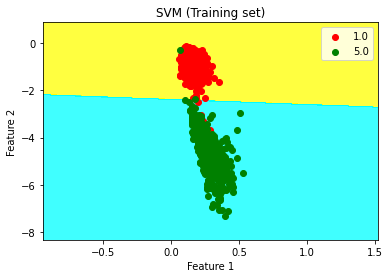

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


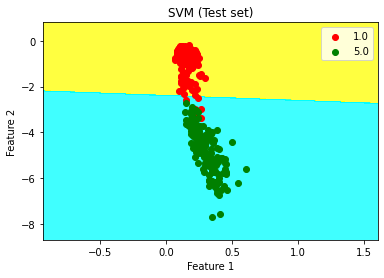

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

(b) In continuation, train only using the first {50, 100, 200, 800} points with the linear kernel. Report the accuracy over the entire test set, and the number of support vectors in each of these cases.

In [ ]:
X_train_50 = df_train.iloc[:50, [1, 2]].values
y_train_50 = df_train.iloc[:50, 0].values
X_train_100 = df_train.iloc[:100, [1, 2]].values
y_train_100 = df_train.iloc[:100, 0].values
X_train_200 = df_train.iloc[:200, [1, 2]].values
y_train_200 = df_train.iloc[:200, 0].values
X_train_800 = df_train.iloc[:800, [1, 2]].values
y_train_800 = df_train.iloc[:800, 0].values

X_train_800.shape

print(X_train_50)

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train_50, y_train_50)
y_pred_50 = classifier.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred_50))
print("Number of Support Vectors: ", len(classifier.support_))

Accuracy Score : 0.9811320754716981
Number of Support Vectors:  2


In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train_100, y_train_100)
y_pred_100 = classifier.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred_100))
print("Number of Support Vectors: ", len(classifier.support_))

Accuracy Score : 0.9811320754716981
Number of Support Vectors:  4


In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train_200, y_train_200)
y_pred_200 = classifier.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred_200))
print("Number of Support Vectors: ", len(classifier.support_))

Accuracy Score : 0.9811320754716981
Number of Support Vectors:  8


In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train_800, y_train_800)
y_pred_800 = classifier.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred_800))
print("Number of Support Vectors: ", len(classifier.support_))

Accuracy Score : 0.9811320754716981
Number of Support Vectors:  14


(c) Consider the polynomial kernel K(x<sub>n</sub>, x<sub>m</sub>) = (1 + x<sup>T</sup><sub>
n</sub>x<sub>m</sub>)<sup>Q</sup>, where Q is the degree of
the polynomial. \
Comparing Q = 2 with Q = 5, comment whether each of the following
statements is TRUE or FALSE.
1. When C = 0.0001, training error is higher at Q = 5.
2. When C = 0.001, the number of support vectors is lower at Q = 5.
3. When C = 0.01, training error is higher at Q = 5.
4. When C = 1, test error is lower at Q = 5.

In [ ]:
q = 2
my_C = 0.0001
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
train_error_2 = 1 - classifier.score(X_train, y_train)
print("Training Error: ", train_error_2)

Training Error:  0.25368353619474693


In [ ]:
q = 5
my_C = 0.0001
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
train_error_5 = 1 - classifier.score(X_train, y_train)
print("Training Error: ", train_error_5)

Training Error:  0.018577834721332454


In [ ]:
print(train_error_5 > train_error_2)

False


In [ ]:
q = 2
my_C = 0.001
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
nsv2 = len(classifier.support_)
print("Number of Support Vectors: ", nsv2)

Number of Support Vectors:  456


In [ ]:
q = 5
my_C = 0.001
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
nsv5 = len(classifier.support_)
print("Number of Support Vectors: ", nsv5)

Number of Support Vectors:  72


In [ ]:
print(nsv5 < nsv2)

True


In [ ]:
q = 2
my_C = 0.01
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
train_error_2 = 1 - classifier.score(X_train, y_train)
print("Training Error: ", train_error_2)

Training Error:  0.005124919923126248


In [ ]:
q = 5
my_C = 0.01
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
train_error_5 = 1 - classifier.score(X_train, y_train)
print("Training Error: ", train_error_5)

Training Error:  0.004484304932735439


In [ ]:
print(train_error_5 > train_error_2)

False


In [ ]:
q = 2
my_C = 1
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
test_error_2 = 1 - classifier.score(X_test, y_test)
print("Test Error: ", test_error_2)

Test Error:  0.021226415094339646


In [ ]:
q = 5
my_C = 1
classifier = SVC(kernel = 'poly', C = my_C, coef0 = 1, degree = q, random_state = 42)
classifier.fit(X_train, y_train)
test_error_5 = 1 - classifier.score(X_test, y_test)
print("Test Error: ", test_error_5)

Test Error:  0.02358490566037741


In [ ]:
print(test_error_5 < test_error_2)

False


(d) Consider the radial basis function (RBF) kernel K(x<sub>n</sub>, x<sub>m</sub>) = e(-||x<sub>n</sub> - x<sub>m</sub>||<sup>2</sup>) in the soft-margin SVM approach. Which value of \
\begin{align}
C\ \epsilon\ \{\ 0.01,\ 1,\ 100,\ 10^4,\ 10^6 \}
\end{align}
results in the lowest training error? The lowest test error? Show the error values for all the C values.

In [ ]:
min_train = None
min_train_C = None
min_test = None
min_test_C = None

for my_C in np.logspace(-2, 6, 5):
  classifier = SVC(kernel = 'rbf', C = my_C, gamma = 1, random_state = 42)
  classifier.fit(X_train, y_train)
  print("C =", my_C)
  train_error = 1 - classifier.score(X_train, y_train)
  test_error = 1 - classifier.score(X_test, y_test)

  if min_train is None : 
    min_train = train_error
    min_train_C = my_C
  
  if min_test is None : 
    min_test = test_error
    min_test_C = my_C

  if train_error < min_train : 
    min_train = train_error
    min_train_C = my_C

  if test_error < min_test : 
    min_test = test_error
    min_test_C = my_C
  
  print("Training Error: ", train_error)
  print("Test Error: ", test_error)

print("Minimum Training Error =", min_train, "when C =", min_train_C)
print("Minimum Test Error =", min_test, "when C =", min_test_C)

C = 0.01
Training Error:  0.0038436899423446302
Test Error:  0.02358490566037741
C = 1.0
Training Error:  0.004484304932735439
Test Error:  0.021226415094339646
C = 100.0
Training Error:  0.0032030749519538215
Test Error:  0.018867924528301883
C = 10000.0
Training Error:  0.002562459961563124
Test Error:  0.02358490566037741
C = 1000000.0
Training Error:  0.0006406149903908087
Test Error:  0.02358490566037741
Minimum Training Error = 0.0006406149903908087 when C = 1000000.0
Minimum Test Error = 0.018867924528301883 when C = 100.0
